In [23]:
import numpy as np
import pandas as pd
from nilm_analyzer.loaders import REFIT_Loader

In [24]:
src_path = r'C:\Users\44749\NILM\nilm_analyzer_EM401\refit'
target_appliance = 'dishwasher'
target_houses=list(np.arange(1,22))

refit_data = REFIT_Loader(data_path=r'C:\Users\44749\NILM\nilm_analyzer_EM401\refit')
appliance_data = refit_data.get_appliance_data(appliance=target_appliance, houses=target_houses)
appliance_data.resample(sampling_period= 8)

Fetching the meter_appliance mapping from REFIT metadata: C:\Users\44749\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\nilm_analyzer\metadata\refit

Loading specified buildings: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21]
Dataset successfully loaded!
Loading data for appliance DISHWASHER ...
Fetching DISHWASHER data for House 1
Resampling for house number:  1
sampling_period = 8s, window_limit = 22 samples, fill_value = 0.0

Updating data with resampled dataset...


In [25]:
appliance_data.get_activations(threshold_x=35.0, threshold_y=80.0, min_limit=5.0, max_limit=200.0)


Extracting activations for House 1
Consumption Threshold is set to = 80.0
Time Delay Threshold is set to = 35.0 minutes
Estimating active durations of: dishwasher
Updating activations with durations when appliance is active (above threshold).


In [26]:
appliance_activations = dict()

print('\nConverting activities to arrays')
for house_number in appliance_data.activations.keys():
    print(f'Processing for house {house_number}')
    filter_activities = appliance_data.activations[house_number].sort_values(by='duration_in_minutes', ascending=False).head(100)
    activities_lst = []
    durations_lst = []
    for row in range(0, len(filter_activities)):
        activities_lst.append(np.array(appliance_data.data[house_number].loc[str(filter_activities['activity_start'].iloc[row]- pd.Timedelta(seconds=10)):
                                           str(filter_activities['activity_end'].iloc[row]+pd.Timedelta(seconds=10))][appliance_data.data[house_number].columns[-1]]))
        durations_lst.append(filter_activities['duration_in_minutes'].iloc[row])
    appliance_activations.update({house_number:{'activities_seq':activities_lst, 'duration_in_minutes':durations_lst}})


Converting activities to arrays
Processing for house 1


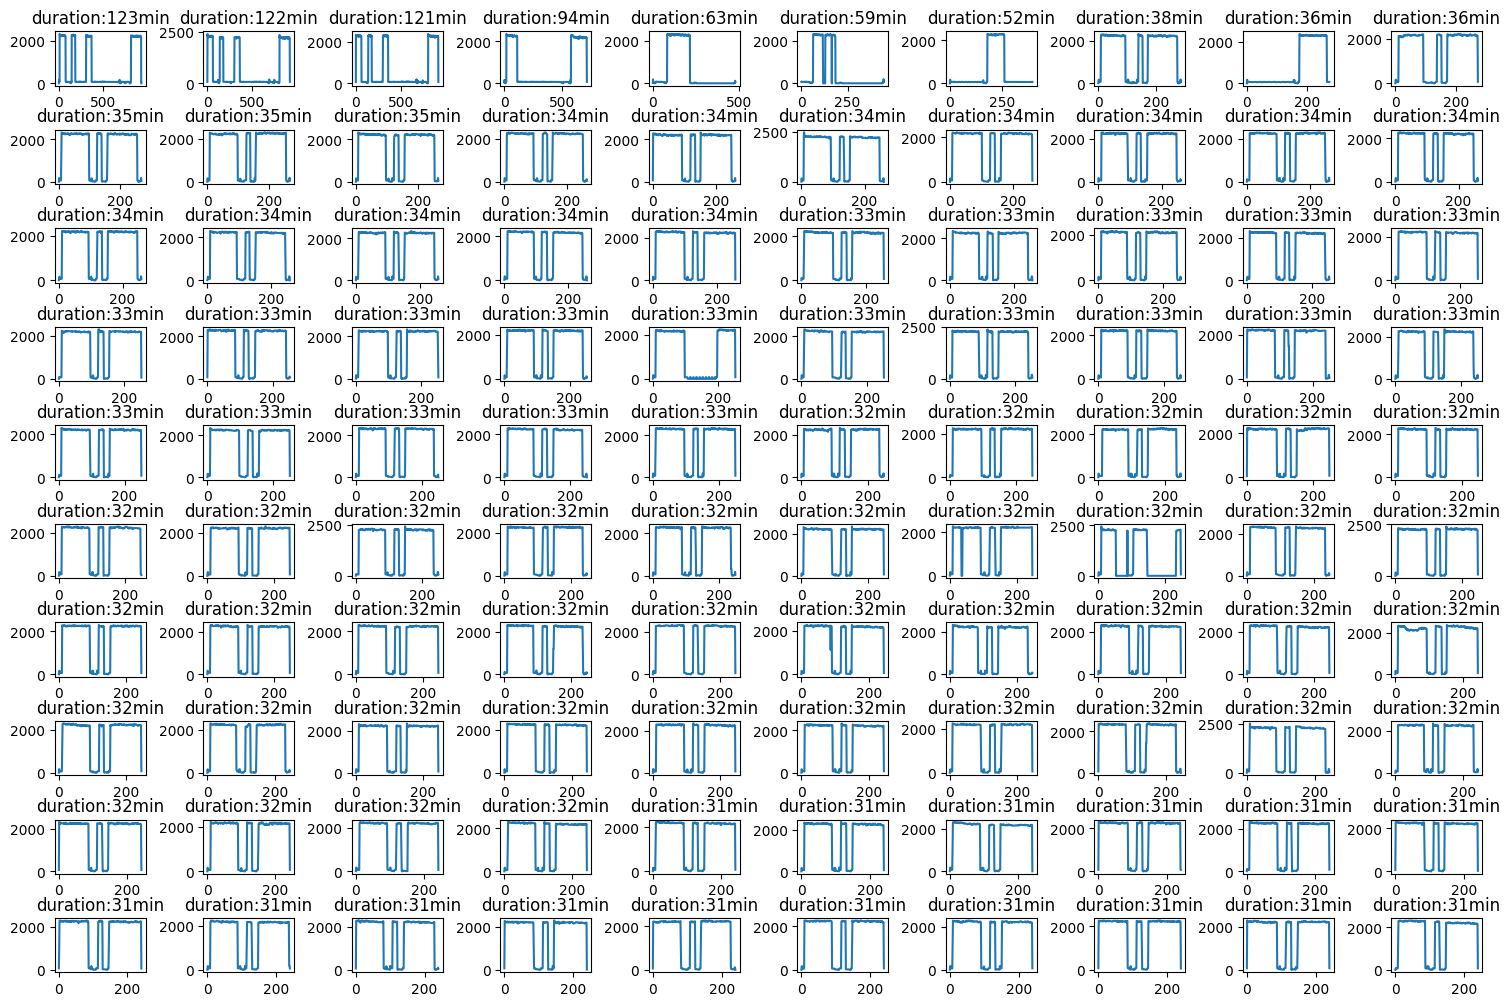

In [27]:
from matplotlib import pyplot as plt
house = 1
rows = 10
columns = 10
fig, axs = plt.subplots(rows, columns, figsize=(15,10))
fig.tight_layout()

plot_number = 0
for i in range(0,rows):
    for j in range(0,columns):
        axs[i,j].plot(pd.Series(appliance_activations[house]['activities_seq'][plot_number]))
        axs[i,j].set_title(f"duration:{int(appliance_activations[house]['duration_in_minutes'][plot_number])}min")
        plot_number+=1